In [1]:
import numpy as np

In [2]:
import pandas as pd


In [3]:
import matplotlib.pyplot as plt

In [6]:
data_cust = pd.read_csv("CUSTOMERS.csv")


In [7]:
data_seller = pd.read_csv("Sellers.csv")
data_prod = pd.read_csv("Products.csv")
data_odr = pd.read_csv("Orders.csv")
data_odr_itms = pd.read_csv("Order_Items.csv")
data_odr_pyt = pd.read_csv("Order_Payments.csv")
data_odr_rev_rtgs = pd.read_csv("Order_Review_Ratings.csv")
data_geo_loc = pd.read_csv("Geo_Location.csv")
data_seller2 = pd.merge(data_seller,data_odr_itms, on ="seller_id", how = "inner")
data_odr_ptm = pd.merge(data_odr,data_odr_pyt, on= "order_id", how = "inner")
data_odr_ptm2 = pd.merge(data_odr_ptm,data_seller2, on="order_id", how = "inner")
data_odr_ptm3 = pd.merge(data_cust,data_odr_ptm2, on ="customer_id" , how = "inner" )
data_odr_ptm4 = pd.merge(data_prod,data_odr_ptm3, on = "product_id", how = "inner")

data1 = pd.merge(data_odr_itms, data_odr_rev_rtgs, on = "order_id", how = "inner")
data2 = pd.merge(data1,data_prod, on = "product_id", how = "inner" )
data3 = pd.merge(data2, data_seller, on = "seller_id", how = "inner")

In [8]:
data_cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh


In [9]:
data_seller.columns = ['seller_id', 'zip_code_prefix', 'seller_city', 'seller_state']

In [10]:
data_seller.head()

,seller_id,zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh


In [11]:
data_prod.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
data_odr.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10-02-2017 10:56,10-02-2017 11:07,10-04-2017 19:55,10-10-2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,08-07-2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,08-08-2018 08:38,08-08-2018 08:55,08-08-2018 13:50,8/17/2018 18:06,09-04-2018 00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12-02-2017 00:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


In [13]:
data_odr_ptm.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10-02-2017 10:56,10-02-2017 11:07,10-04-2017 19:55,10-10-2017 21:25,10/18/2017 0:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10-02-2017 10:56,10-02-2017 11:07,10-04-2017 19:55,10-10-2017 21:25,10/18/2017 0:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10-02-2017 10:56,10-02-2017 11:07,10-04-2017 19:55,10-10-2017 21:25,10/18/2017 0:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,08-07-2018 15:27,8/13/2018 0:00,1,UPI,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,08-08-2018 08:38,08-08-2018 08:55,08-08-2018 13:50,8/17/2018 18:06,09-04-2018 00:00,1,credit_card,3,179.12


In [14]:
data_odr_itms.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14


In [15]:
data_odr_pyt.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [16]:
data_odr_rev_rtgs.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26


In [17]:
data_geo_loc.columns = ['zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state']

In [19]:
data_geo_loc.head()

,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh


In [20]:
data2.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29,97ca439bc427b48bc1cd7177abe71365,5,9/21/2017 0:00,9/22/2017 10:57,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,7/5/2017 2:44,55.9,17.96,b11cba360bbe71410c291b764753d37f,5,7/14/2017 0:00,7/17/2017 12:50,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,5/23/2018 10:56,64.9,18.33,af01c4017c5ab46df6cc810e069e654a,4,6/5/2018 0:00,6/6/2018 21:41,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,8/7/2017 18:55,58.9,16.17,8304ff37d8b16b57086fa283fe0c44f8,5,8/10/2017 0:00,8/13/2017 3:35,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,8/16/2017 22:05,58.9,13.29,426f43a82185969503fb3c86241a9535,5,8/25/2017 0:00,8/28/2017 0:51,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [21]:
data3.columns = ['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'review_id',
       'review_score', 'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'zip_code_prefix', 'seller_city', 'seller_state']

In [22]:
data_geo_loc.columns = ['zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state']


In [23]:
data_geo_loc.head()

,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh


In [24]:
data4 = pd.merge(data3,data_geo_loc, on = "zip_code_prefix", how = "inner" )


# 1. Perform Detailed exploratory analysis
a. Define & calculate high level metrics 
like(Total Revenue, Total quantity, Total 
products, Total categories, Total sellers, Total locations, Total channels, Total 
payment methods etc…) 

In [25]:
# Total Revenue
total_revenue = data_odr_pyt['payment_value'].sum()

# Total Quantity
total_quantity = data_odr_itms['order_item_id'].sum()


# Total Products
total_products = data_prod['product_id'].nunique()

# Total Categories
total_categories = data_prod['product_category_name'].nunique()

# Total Sellers
total_sellers = data_seller['seller_id'].nunique()

# Total Locations
total_locations = data_geo_loc['zip_code_prefix'].nunique()

# Total Channels
total_channels = data_odr_pyt['payment_type'].nunique()

# Total Payment Methods
total_payment_methods = data_odr_pyt['payment_type'].nunique()

# Print the results
print("Total Revenue:", total_revenue)
print("Total Quantity:", total_quantity)
print("Total Products:", total_products)
print("Total Categories:", total_categories)
print("Total Sellers:", total_sellers)
print("Total Locations:", total_locations)
print("Total Channels:", total_channels)
print("Total Payment Methods:", total_payment_methods)

Total Revenue: 16008872.12
Total Quantity: 134936
Total Products: 32951
Total Categories: 71
Total Sellers: 3095
Total Locations: 19015
Total Channels: 5
Total Payment Methods: 5


# 1.b : Understanding how many new customers acquired every month

In [26]:
data_odr['order_purchase_timestamp'] = pd.to_datetime(data_odr['order_purchase_timestamp'])


data_odr['year'] = data_odr['order_purchase_timestamp'].dt.year
data_odr['month'] = data_odr['order_purchase_timestamp'].dt.month

customer_acquisition = data_odr.groupby(['year', 'month'])['customer_id'].nunique().reset_index()
customer_acquisition.rename(columns={'customer_id': 'new_customers'}, inplace=True)
customer_acquisition.groupby("year")
customer_acquisition = customer_acquisition.sort_values(by = "month", ascending = True).reset_index()


customer_acquisition.groupby("year")["new_customers"].sum().reset_index()

,year,new_customers
0,2016,329
1,2017,45101
2,2018,54011


In [27]:
customer_acquisition.groupby("month")["new_customers"].sum().reset_index()

,month,new_customers
0,1,8069
1,2,8508
2,3,9893
3,4,9343
4,5,10573
5,6,9412
6,7,10318
7,8,10843
8,9,4305
9,10,4959


# 1.c : Understand the retention of customers on month on month basis

In [28]:
data_odr['order_purchase_timestamp'] = pd.to_datetime(data_odr['order_purchase_timestamp'])


data_odr['year'] = data_odr['order_purchase_timestamp'].dt.year
data_odr['month'] = data_odr['order_purchase_timestamp'].dt.month


customer_retention = data_odr.groupby(['year', 'month'])['customer_id'].nunique().reset_index()
customer_retention.rename(columns={'customer_id': 'total_customers'}, inplace=True)


customer_retention['prev_total_customers'] = customer_retention['total_customers'].shift(1)


customer_retention['retention_rate'] = (customer_retention['total_customers'] / customer_retention['prev_total_customers']) * 100


customer_retention['retention_rate'].fillna(100, inplace=True)

customer_retention

,year,month,total_customers,prev_total_customers,retention_rate
0,2016,9,4,NaN,100.000000
1,2016,10,324,4.0,8100.000000
2,2016,12,1,324.0,0.308642
3,2017,1,800,1.0,80000.000000
4,2017,2,1780,800.0,222.500000
5,2017,3,2682,1780.0,150.674157
6,2017,4,2404,2682.0,89.634601
7,2017,5,3700,2404.0,153.910150
8,2017,6,3245,3700.0,87.702703
9,2017,7,4026,3245.0,124.067797


 # 1.d :  How the revenues from existing/new customers on month on month basis

In [29]:
data_odr_ptm = pd.merge(data_odr,data_odr_pyt, on= "order_id", how = "inner")

In [30]:
monthly_revenue = data_odr_ptm.groupby(['year', 'month'])['payment_value'].sum().reset_index()


customer_acquisition = data_odr.groupby(['year', 'month'])['customer_id'].nunique().reset_index()
customer_acquisition.rename(columns={'customer_id': 'new_customers'}, inplace=True)


revenue_by_month = pd.merge(monthly_revenue, customer_acquisition, on=['year', 'month'], how='left')
revenue_by_month['new_customers'].fillna(0, inplace=True) 


revenue_by_month['revenue_existing_customers'] = revenue_by_month['payment_value'] - revenue_by_month['new_customers']

revenue_by_month

,year,month,payment_value,new_customers,revenue_existing_customers
0,2016,9,252.24,4,248.24
1,2016,10,59090.48,324,58766.48
2,2016,12,19.62,1,18.62
3,2017,1,138488.04,800,137688.04
4,2017,2,291908.01,1780,290128.01
5,2017,3,449863.60,2682,447181.60
6,2017,4,417788.03,2404,415384.03
7,2017,5,592918.82,3700,589218.82
8,2017,6,511276.38,3245,508031.38
9,2017,7,592382.92,4026,588356.92


# 1.e: Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

In [31]:
data_odr_ptm['order_purchase_timestamp'] = pd.to_datetime(data_odr_ptm['order_purchase_timestamp'])


data_odr_ptm['year'] = data_odr_ptm['order_purchase_timestamp'].dt.year
data_odr_ptm['month'] = data_odr_ptm['order_purchase_timestamp'].dt.month

monthly_sales = data_odr_ptm.pivot_table(index =['year', 'month'], values = 'payment_value', aggfunc ="sum")



In [32]:
monthly_sales

payment_value
year month               
2016 9             252.24
     10          59090.48
     12             19.62
2017 1          138488.04
     2          291908.01
     3          449863.60
     4          417788.03
     5          592918.82
     6          511276.38
     7          592382.92
     8          674396.32
     9          727762.45
     10         779677.88
     11        1194882.80
     12         878401.48
2018 1         1115004.18
     2          992463.34
     3         1159652.12
     4         1160785.48
     5         1153982.15
     6         1023880.50
     7         1066540.75
     8         1022425.32
     9            4439.54
     10            589.67

#  1.f : Popular Products by month, seller, state, category.

In [33]:
data_odr_ptm3

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_value,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_item_id,product_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,5/16/2017 15:05,5/16/2017 15:22,5/23/2017 10:47,...,146.87,7c67e1448b00f6e969d365cea6b010ab,8577,Vijayawada,Andhra Pradesh,1,a9516a079e37a9c9c36b9b78b10169e8,5/22/2017 15:22,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,01-12-2018 20:48,01-12-2018 20:58,1/15/2018 17:14,...,335.48,b8bc237ba3788b23da09c0f1f3a3288c,88303,Sadasivpet,Andhra Pradesh,1,4aa6014eceb682077f9dc4bffebc05b0,1/18/2018 20:58,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,5/19/2018 16:07,5/20/2018 16:19,06-11-2018 14:31,...,157.73,7c67e1448b00f6e969d365cea6b010ab,8577,Vijayawada,Andhra Pradesh,1,bd07b66896d6f1494f5b86251848ced7,6/5/2018 16:19,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,3/13/2018 16:06,3/13/2018 17:29,3/27/2018 23:22,...,173.30,7c67e1448b00f6e969d365cea6b010ab,8577,Vijayawada,Andhra Pradesh,1,a5647c44af977b148e0a3a4751a09e2e,3/27/2018 16:31,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,7/29/2018 9:51,7/29/2018 10:10,7/30/2018 15:16,...,252.25,4a3ca9315b744ce9f8e9374361493884,14940,Tarsali,Gujarat,1,9391a573abe00141c56e38d84d7d5b3b,7/31/2018 10:10,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,04-07-2018 15:48,04-07-2018 16:08,04-11-2018 02:08,...,88.78,527801b552d0077ffd170872eb49683b,17400,Kansepur,Haryana,1,ccb4503d9d43d245d3b295d0544f988b,4/12/2018 16:08,74.90,13.88
117597,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,04-04-2018 08:20,04-04-2018 08:35,04-05-2018 18:42,...,129.06,3fd1e727ba94cfe122d165e176ce7967,14802,Singapur,Andhra Pradesh,1,9ede6b0570a75a4b9de4f383329f99ee,4/10/2018 8:35,114.90,14.16
117598,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,04-08-2018 20:11,04-08-2018 20:30,04-09-2018 17:52,...,56.04,d9e7e7778b32987280a6f2cb9a39c57d,3304,Akkarampalle,Andhra Pradesh,1,7a5d2e1e131a860ae7d18f6fffa9d689,4/12/2018 20:30,37.00,19.04
117599,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,11-03-2017 21:08,11-03-2017 21:31,11-06-2017 18:24,...,711.07,4869f7a5dfa277a7dca6462dcf3b52b2,14840,Freelandgunj,Gujarat,1,f819f0c84a64f02d3a5606ca95edd272,11/9/2017 21:15,689.00,22.07


In [34]:
data_odr_ptm3['order_purchase_timestamp'] = pd.to_datetime(data_odr_ptm3['order_purchase_timestamp'])
data_odr_ptm3['year'] = data_odr_ptm3['order_purchase_timestamp'].dt.year
data_odr_ptm3['month'] = data_odr_ptm3['order_purchase_timestamp'].dt.month

# Popular Products by Month
popular_products_by_month = data_odr_ptm3.groupby(['year', 'month', 'product_id'])['order_id'].count().reset_index()
popular_products_by_month.rename(columns={'order_id': 'order_count'}, inplace=True)

# Popular Products by Seller
popular_products_by_seller = data_odr_ptm3.groupby(['seller_id', 'product_id'])['order_id'].count().reset_index()
popular_products_by_seller.rename(columns={'order_id': 'order_count'}, inplace=True)

# Popular Products by State
popular_products_by_state = data_odr_ptm3.groupby(['customer_state', 'product_id'])['order_id'].count().reset_index()
popular_products_by_state.rename(columns={'order_id': 'order_count'}, inplace=True)

# Popular Products by Category
# Assuming you have a DataFrame named 'product_data' with product categories

popular_products_by_category = data_odr_ptm4.groupby(['product_category_name', 'product_id'])['order_id'].count().reset_index()
popular_products_by_category.rename(columns={'order_id': 'order_count'}, inplace=True)

# Rank the popular products
popular_products_by_month['rank'] = popular_products_by_month.groupby(['year', 'month'])['order_count'].rank(ascending=False, method='min')
popular_products_by_seller['rank'] = popular_products_by_seller.groupby(['seller_id'])['order_count'].rank(ascending=False, method='min')
popular_products_by_state['rank'] = popular_products_by_state.groupby(['customer_state'])['order_count'].rank(ascending=False, method='min')
popular_products_by_category['rank'] = popular_products_by_category.groupby(['product_category_name'])['order_count'].rank(ascending=False, method='min')


In [37]:
popular_products_by_month


,year,month,product_id,order_count,rank
0,2016,9,c1488892604e4ba5cff5b4eb4d595400,1,1.0
1,2016,9,f293394c72c9b5fafd7023301fc21fc2,1,1.0
2,2016,9,f3c2d01a84c947b078e32bbef0718962,1,1.0
3,2016,10,027cdd14a677a5834bc67a9789db5021,1,58.0
4,2016,10,04df667e73ca2fab4b9a97c86466b699,1,58.0
...,...,...,...,...,...
62170,2018,8,ffc9caf33e2d1e9f44e3e06da19085f7,1,1213.0
62171,2018,8,ffd4bf4306745865e5692f69bd237893,1,1213.0
62172,2018,8,ffd9ac56db9194a413298faaa03cd176,1,1213.0
62173,2018,8,fffdb2d0ec8d6a61f0a0a0db3f25b441,2,538.0


In [38]:
popular_products_by_seller

,seller_id,product_id,order_count,rank
0,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,3,1.0
1,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,115,1.0
2,001cca7ae9ae17fb1caed9dfb1094831,0da9ffd92214425d880de3f94e74ce39,17,4.0
3,001cca7ae9ae17fb1caed9dfb1094831,21fecd254a3103704126b28478ea7980,3,7.0
4,001cca7ae9ae17fb1caed9dfb1094831,4d7fee7877228c1497477ae53d97c214,2,8.0
...,...,...,...,...
34443,ffff564a4f9085cd26170f4732393726,cb17b798ba889575385281b7ec2fc22b,1,6.0
34444,ffff564a4f9085cd26170f4732393726,dbd024d4182504993ad1e3cd2ee9d9e9,2,1.0
34445,ffff564a4f9085cd26170f4732393726,de6517dda8e49774f58c07f80abc8d7a,1,6.0
34446,ffff564a4f9085cd26170f4732393726,e20b58fe57d487f33247e6cc1154eb9c,1,6.0


In [41]:
popular_products_by_state.head()

,customer_state,product_id,order_count,rank
0,Andhra Pradesh,00088930e925c41fd95ebfe695fd2655,1,10628.0
1,Andhra Pradesh,0009406fd7479715e4bef61dd91f2462,1,10628.0
2,Andhra Pradesh,000b8f95fcb9e0096488278317764d19,1,10628.0
3,Andhra Pradesh,000d9be29b5207b54e86aa1b1ac54872,1,10628.0
4,Andhra Pradesh,0011c512eb256aa0dbbb544d8dffcf6e,1,10628.0


In [42]:
popular_products_by_category.head()

,product_category_name,product_id,order_count,rank
0,Agro_Industry_And_Commerce,018ca97302e4293050cc41413194bb19,1,30.0
1,Agro_Industry_And_Commerce,026f43af35e7951067097527d5c31bcc,2,18.0
2,Agro_Industry_And_Commerce,07f01b6fcacc1b187a71e5074199db2d,15,4.0
3,Agro_Industry_And_Commerce,0a0adf0de1769b2970f3096d0b5abfb7,1,30.0
4,Agro_Industry_And_Commerce,0a27862bbf658a5b8cf655761bc5c72d,1,30.0


# 1.g : Popular categories by state, month

In [43]:
data_odr_ptm4['order_purchase_timestamp'] = pd.to_datetime(data_odr_ptm4['order_purchase_timestamp'])
data_odr_ptm4['year'] = data_odr_ptm4['order_purchase_timestamp'].dt.year
data_odr_ptm4['month'] = data_odr_ptm4['order_purchase_timestamp'].dt.month



# Group the data by state, month, and product category and calculate total sales
popular_categories = data_odr_ptm4.groupby(['customer_state', 'year', 'month', 'product_category_name'])['payment_value'].sum().reset_index()

# Rank the categories within each state and month based on total sales
popular_categories['rank'] = popular_categories.groupby(['customer_state', 'year', 'month'])['payment_value'].rank(ascending=False, method='min')

# Filter and display the popular categories for specific states and months
# For example, to display popular categories in a specific state and month (e.g., 'Andhra Pradesh' in January 2018):
state = 'Andhra Pradesh'
year = 2018
month = 1
popular_categories_filtered = popular_categories[(popular_categories['customer_state'] == state) & (popular_categories['year'] == year) & (popular_categories['month'] == month)]

# Display the popular categories in the specified state and month
popular_categories_filtered

,customer_state,year,month,product_category_name,payment_value,rank
681,Andhra Pradesh,2018,1,Agro_Industry_And_Commerce,2935.89,31.0
682,Andhra Pradesh,2018,1,Air_Conditioning,7042.08,23.0
683,Andhra Pradesh,2018,1,Art,2397.67,36.0
684,Andhra Pradesh,2018,1,Audio,2677.35,34.0
685,Andhra Pradesh,2018,1,Auto,27992.68,8.0
...,...,...,...,...,...,...
740,Andhra Pradesh,2018,1,Stationery,24311.38,10.0
741,Andhra Pradesh,2018,1,Tablets_Printing_Image,63.62,63.0
742,Andhra Pradesh,2018,1,Telephony,11298.36,19.0
743,Andhra Pradesh,2018,1,Toys,16746.06,15.0


In [44]:
popular_categories_filtered.sort_values("rank", ascending = True)

,customer_state,year,month,product_category_name,payment_value,rank
694,Andhra Pradesh,2018,1,Computers_Accessories,86296.23,1.0
687,Andhra Pradesh,2018,1,Bed_Bath_Table,81132.49,2.0
744,Andhra Pradesh,2018,1,Watches_Gifts,65791.73,3.0
716,Andhra Pradesh,2018,1,Furniture_Decor,60356.24,4.0
739,Andhra Pradesh,2018,1,Sports_Leisure,59674.11,5.0
...,...,...,...,...,...,...
691,Andhra Pradesh,2018,1,Christmas_Supplies,103.05,60.0
703,Andhra Pradesh,2018,1,Dvds_Blu_Ray,96.58,61.0
734,Andhra Pradesh,2018,1,Party_Supplies,84.63,62.0
741,Andhra Pradesh,2018,1,Tablets_Printing_Image,63.62,63.0


# 1.h : List top 10 most expensive products sorted by price

In [45]:
top_10_expensive_products = data_odr_itms.sort_values(by='price', ascending=False).head(10)

# Display the top 10 most expensive products
top_10_expensive_products

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2/16/2017 20:37,6735.00,194.31
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,8/2/2018 4:05,6729.00,193.21
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,6/15/2017 2:45,6499.00,227.66
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,4/18/2017 13:25,4799.00,151.34
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,5/9/2017 15:50,4690.00,74.34
62086,8dbc85d1447242f3b127dda390d56e19,1,259037a6a41845e455183f89c5035f18,c72de06d72748d1a0dfb2125be43ba63,6/28/2018 12:36,4590.00,91.78
29193,426a9742b533fc6fed17d1fd6d143d7e,1,a1beef8f3992dbd4cd8726796aa69c53,512d298ac2a96d1931b6bd30aa21f61d,8/16/2018 14:24,4399.87,113.45
45843,68101694e5c5dc7330c91e1bbc36214f,1,6cdf8fc1d741c76586d8b6b15e9eef30,ed4acab38528488b65a9a9c603ff024a,4/5/2018 8:27,4099.99,75.27
78310,b239ca7cd485940b31882363b52e6674,1,dd113cb02b2af9c8e5787e8f1f0722f6,821fb029fc6e495ca4f08a35d51e53a5,8/2/2018 8:15,4059.00,104.51
59137,86c4eab1571921a6a6e248ed312f5a5a,1,6902c1962dd19d540807d0ab8fade5c6,fa1c13f2614d7b5c4749cbc52fecda94,3/23/2017 20:08,3999.90,17.01


# 2. Performing Customers/sellers Segmentation
2.a Divide the customers into groups based on the revenue generated 

In [53]:
customer_revenue = data_odr_ptm4.groupby('customer_id')['payment_value'].sum().reset_index()

# Define segmentation thresholds (e.g., quartiles)
low_revenue_threshold = customer_revenue['payment_value'].quantile(0.25)
high_revenue_threshold = customer_revenue['payment_value'].quantile(0.75)

# Segment customers based on revenue
def segment_customer(revenue):
    if revenue <= low_revenue_threshold:
        return 'Low'
    elif revenue <= high_revenue_threshold:
        return 'Medium'
    else:
        return 'High'

customer_revenue['Segment'] = customer_revenue['payment_value'].apply(segment_customer)
customer_revenue.head()




,customer_id,payment_value,Segment
0,00012a2ce6f8dcda20d059ce98491703,114.74,Medium
1,000161a058600d5901f007fab4c27140,67.41,Medium
2,0001fd6190edaaf884bcaf3d49edf079,195.42,Medium
3,0002414f95344307404f0ace7a26f1d5,179.35,Medium
4,000379cdec625522490c315e70c7a9fb,107.01,Medium


# 2.b : Divide the sellers into groups based on the revenue generated

In [52]:
seller_revenue = data_odr_ptm4.groupby('seller_id')['payment_value'].sum().reset_index()

# Define segmentation thresholds (e.g., quartiles)
low_revenue_threshold = seller_revenue['payment_value'].quantile(0.25)
high_revenue_threshold = seller_revenue['payment_value'].quantile(0.75)

# Segment sellers based on revenue
def segment_seller(revenue):
    if revenue <= low_revenue_threshold:
        return 'Low'
    elif revenue <= high_revenue_threshold:
        return 'Medium'
    else:
        return 'High'

seller_revenue['Segment'] = seller_revenue['payment_value'].apply(segment_seller)

seller_revenue.head()

,seller_id,payment_value,Segment
0,0015a82c2db000af6aaaf3ae2ecb0532,2748.06,Medium
1,001cca7ae9ae17fb1caed9dfb1094831,48349.22,High
2,001e6ad469a905060d959994f1b41e4f,267.94,Low
3,002100f778ceb8431b7a1020ff7ab48f,2445.64,Medium
4,003554e2dce176b5555353e4f3555ac8,139.38,Low


# 3.0 Cross-Selling (Which products are selling together)
Hint: We need to find which of the top 10 combinations of products are selling together in 
each transaction. (combination of 2 or 3 buying together)


In [54]:
basket_sets = pd.crosstab(data4['order_id'], data4['product_category_name'])

# Calculate the co-occurrence matrix
product_co_occurrence = basket_sets.T.dot(basket_sets)

# Filter the matrix to exclude self-co-occurrence
product_co_occurrence.values[[range(product_co_occurrence.shape[0])], [range(product_co_occurrence.shape[1])]] = 0

# Find the product combinations that are frequently sold together
frequently_sold_together = product_co_occurrence.stack().sort_values(ascending=False)

# Display the top product combinations
frequently_sold_together.head(10)

product_category_name  product_category_name
Bed_Bath_Table         Furniture_Decor          137
Furniture_Decor        Bed_Bath_Table           137
Home_Confort           Bed_Bath_Table            64
Bed_Bath_Table         Home_Confort              64
Furniture_Decor        Garden_Tools              60
Garden_Tools           Furniture_Decor           60
Bed_Bath_Table         Housewares                37
Housewares             Bed_Bath_Table            37
Furniture_Decor        Housewares                37
Housewares             Furniture_Decor           37
dtype: int64

# 4. Payment Behaviour
4.a. How customers are paying?

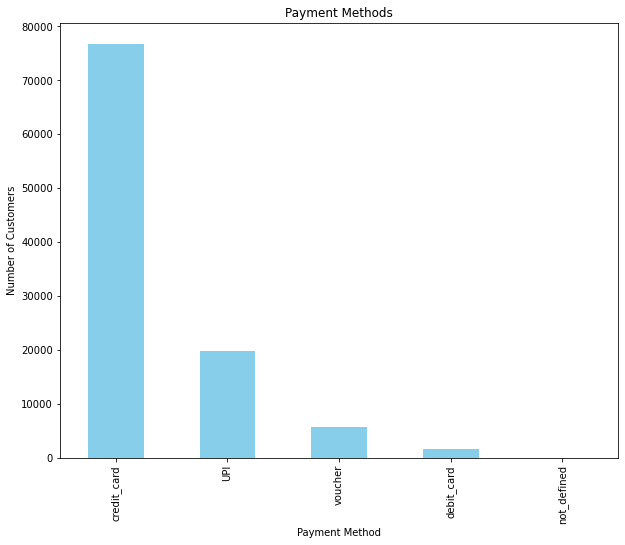

credit_card    76795
UPI            19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64


In [56]:
payment_counts = data_odr_pyt['payment_type'].value_counts()

# Create a bar chart to visualize the payment methods
plt.figure(figsize = (10, 8))
payment_counts.plot(kind='bar', color='skyblue')
plt.title('Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.show()

# Display the payment method counts
print(payment_counts)

# 4.b : Which payment channels are used by most customers?

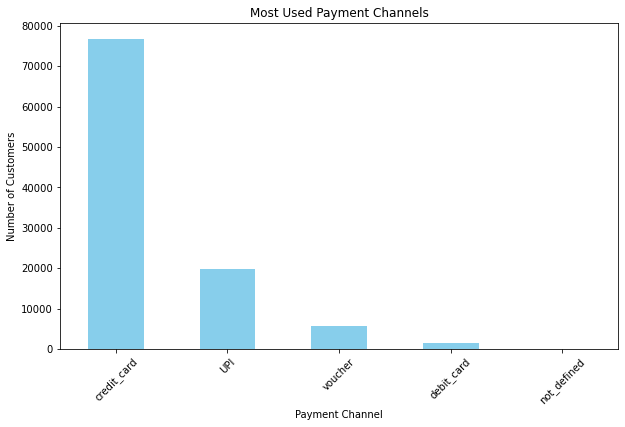

credit_card    76795
UPI            19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [57]:
payment_channel_counts = data_odr_pyt['payment_type'].value_counts()

# Sort the payment channels by count in descending order
sorted_payment_channels = payment_channel_counts.sort_values(ascending=False)

# Create a bar chart to visualize the most used payment channels
plt.figure(figsize=(10, 6))
sorted_payment_channels.plot(kind='bar', color='skyblue')
plt.title('Most Used Payment Channels')
plt.xlabel('Payment Channel')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# Display the payment channels used by the most customers
sorted_payment_channels

# 5.a Customer satisfaction towards category & product
 Which categories (top 10) are maximum rated & minimum rated?

In [58]:
category_avg_scores = data2.groupby('product_category_name')['review_score'].mean()

# Sort categories by average review score in descending order (maximum rated)
top_10_max_rated = category_avg_scores.sort_values(ascending=False).head(10)

# Sort categories by average review score in ascending order (minimum rated)
top_10_min_rated = category_avg_scores.sort_values().head(10)
print("Maximum rated product", top_10_max_rated)

print("Minimum Rated Product ", top_10_min_rated)



Maximum rated product product_category_name
Cds_Dvds_Musicals                        4.642857
Fashion_Childrens_Clothes                4.500000
Books_General_Interest                   4.439421
Books_Imported                           4.400000
Costruction_Tools_Tools                  4.359223
Books_Technical                          4.338290
Luggage_Accessories                      4.309524
Food_Drink                               4.303571
Small_Appliances_Home_Oven_And_Coffee    4.302632
Fashion_Sport                            4.258065
Name: review_score, dtype: float64
Minimum Rated Product  product_category_name
Security_And_Services     2.500000
Diapers_And_Hygiene       3.256410
Home_Comfort_2            3.366667
Office_Furniture          3.484421
Fashion_Male_Clothing     3.621212
Fixed_Telephony           3.671698
Party_Supplies            3.767442
Fashio_Female_Clothing    3.780000
La_Cuisine                3.785714
Audio                     3.808219
Name: review_score, dtype:

# 5.b: Which products (top10) are maximum rated & minimum rated?

In [59]:
product_avg_scores = data2.groupby('product_id')['review_score'].mean()

# Sort products by average review score in descending order (maximum rated)
top_10_max_rated = product_avg_scores.sort_values(ascending=False).head(10)

# Sort products by average review score in ascending order (minimum rated)
top_10_min_rated = product_avg_scores.sort_values().head(10)

top_10_max_rated



product_id
00066f42aeeb9f3007548bb9d3f33c38    5.0
86743ff92eee3d16b7df59cddd583b8c    5.0
868ceb027ab706a4dee42e2220006b85    5.0
868969d3a93aeeab7bfcd4fc3d3d65de    5.0
868766ed2172644fdd977d6bd395a107    5.0
8684bd8f93b4f4038d07188a23811e93    5.0
867c96d2bb67aba6500a4c509cf76072    5.0
867b820367ec206b38a357f2c12454b7    5.0
867901d7e8488fb97f1fb538c09d476e    5.0
865bfa00c1dad8f4146d3c2765f051ca    5.0
Name: review_score, dtype: float64

In [60]:
# minimum rated
top_10_min_rated

product_id
592cc6634d2c783d297effc0b828bc37    1.0
28c95d7653177449fd4b6fc7adb63ce9    1.0
28d6d6a10ceb0636ae572e7efafef612    1.0
28d7da9ebe96bfda54aed060b68b23a1    1.0
8c4e5e50a08a443b7fbad34ad7587625    1.0
8c4dc358af6e14174f2114be62c18f37    1.0
8c4456c061013adccb1ba4cbce2d0365    1.0
8c35dc99b37ba51780800ba049ed3616    1.0
28fe66c8a81afe9be7829f40a5fae9ee    1.0
ee37349d258101b9d573a256d1401ff7    1.0
Name: review_score, dtype: float64

# 5.c: Average rating by location, seller, product, category, month etc.

In [62]:

data5 = pd.merge(data4, data_prod, on = "product_id", how = "inner")

In [63]:
data = data4.pivot_table(index = "geolocation_state", values = "review_score" , aggfunc = "mean")

In [64]:
data.sort_values("review_score", ascending = False)

,review_score
geolocation_state,
Uttaranchal,4.524590
Orissa,4.233918
Arunachal Pradesh,4.200000
West Bengal,4.188184
Himachal Pradesh,4.182990
Kerala,4.140127
Chhattisgarh,4.102425
Haryana,4.070826
Madhya Pradesh,4.039499


In [71]:
data_ = data5.pivot_table(index = "product_category_name_y", values = "review_score",aggfunc = "mean" )

In [72]:
data_

,review_score
product_category_name_y,
Agro_Industry_And_Commerce,4.000000
Air_Conditioning,3.919192
Art,3.918660
Arts_And_Craftmanship,4.125000
Audio,3.808219
...,...
Stationery,4.183771
Tablets_Printing_Image,4.048193
Telephony,3.933186
